<a href="https://colab.research.google.com/github/vamshi2315/btpp/blob/main/Copy_of_tensile_strength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  %%html
<marquee   style=width:35% >     PROJECT    </marquee>


<marquee    style=width:34%   >    PREDICTION OF MECHANICAL PROPERTIES OF FRICTION STIR WELD USING MACHINE LEARNING   </marquee>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
path = '/content/drive/MyDrive/final year project/finaldatapr.csv'
data = pd.read_csv(path)

In [ ]:
data

,V0 (Tilt Angle),V1 (Axial Load),V2 (Rotational Speed),V3 (Welding Speed),V4 (Thickness of Plate),Tensile strength (MPa)
0,3,2.0,600,75,4,201.4173
1,3,2.0,600,90,4,207.5238
2,3,2.0,900,115,4,200.4701
3,3,2.0,1200,115,4,210.9491
4,3,2.5,600,75,4,212.8087
...,...,...,...,...,...,...
77,4,3.0,600,75,5,204.4071
78,4,3.0,600,115,5,217.7037
79,4,3.0,900,90,5,226.0705
80,4,3.0,1200,75,5,219.0428


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   V0 (Tilt Angle)           82 non-null     int64  
 1   V1 (Axial Load)           82 non-null     float64
 2   V2 (Rotational Speed)     82 non-null     int64  
 3   V3 (Welding Speed)        82 non-null     int64  
 4   V4 (Thickness of Plate)   82 non-null     int64  
 5   Tensile strength (MPa)    82 non-null     float64
dtypes: float64(2), int64(4)
memory usage: 4.0 KB


In [ ]:
data.describe()

,V0 (Tilt Angle),V1 (Axial Load),V2 (Rotational Speed),V3 (Welding Speed),V4 (Thickness of Plate),Tensile strength (MPa)
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,3.646341,2.481707,914.634146,92.560976,4.365854,218.410483
std,0.481047,0.411600,244.506028,16.964813,0.676085,9.599827
min,3.000000,2.000000,600.000000,75.000000,3.000000,197.187800
25%,3.000000,2.000000,600.000000,75.000000,4.000000,212.698150
50%,4.000000,2.500000,900.000000,90.000000,4.000000,217.518700
75%,4.000000,3.000000,1200.000000,115.000000,5.000000,226.947125
max,4.000000,3.000000,1200.000000,115.000000,5.000000,242.692900


In [ ]:
data.isnull().any()

V0 (Tilt Angle)             False
V1 (Axial Load)             False
V2 (Rotational Speed)       False
V3 (Welding Speed)          False
V4 (Thickness of Plate)     False
Tensile strength (MPa)      False
dtype: bool

In [ ]:
import seaborn as sns

In [ ]:
cor = data.corr()

In [ ]:
cor

,V0 (Tilt Angle),V1 (Axial Load),V2 (Rotational Speed),V3 (Welding Speed),V4 (Thickness of Plate),Tensile strength (MPa)
V0 (Tilt Angle),1.000000,-0.407191,-0.081411,-0.031363,0.023146,-0.247433
V1 (Axial Load),-0.407191,1.000000,0.021094,-0.090450,0.090894,0.399382
V2 (Rotational Speed),-0.081411,0.021094,1.000000,0.294436,0.056832,0.450309
V3 (Welding Speed),-0.031363,-0.090450,0.294436,1.000000,-0.104225,0.294988
V4 (Thickness of Plate),0.023146,0.090894,0.056832,-0.104225,1.000000,0.040723
Tensile strength (MPa),-0.247433,0.399382,0.450309,0.294988,0.040723,1.000000


In [ ]:
cor_table = cor.iloc[:5,-1:]
cor_table

,Tensile strength (MPa)
V0 (Tilt Angle),-0.247433
V1 (Axial Load),0.399382
V2 (Rotational Speed),0.450309
V3 (Welding Speed),0.294988
V4 (Thickness of Plate),0.040723


In [ ]:
from matplotlib import pyplot as plt

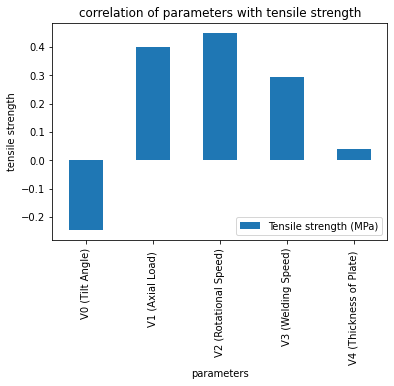

In [ ]:
cor_table.plot.bar( )
plt.title("correlation of parameters with tensile strength")
plt.xlabel("parameters")
plt.ylabel("tensile strength")
plt.show()

<AxesSubplot:>

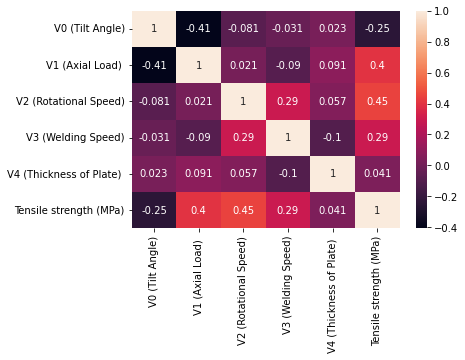

In [ ]:
sns.heatmap(cor,annot=True, 
        xticklabels=cor.columns,
        yticklabels=cor.columns)

In [ ]:
X=data.iloc[:,0:5]
y=data.iloc[:,-1:]

In [ ]:
X

,V0 (Tilt Angle),V1 (Axial Load),V2 (Rotational Speed),V3 (Welding Speed),V4 (Thickness of Plate)
0,3,2.0,600,75,4
1,3,2.0,600,90,4
2,3,2.0,900,115,4
3,3,2.0,1200,115,4
4,3,2.5,600,75,4
...,...,...,...,...,...
77,4,3.0,600,75,5
78,4,3.0,600,115,5
79,4,3.0,900,90,5
80,4,3.0,1200,75,5


In [ ]:
y

,Tensile strength (MPa)
0,201.4173
1,207.5238
2,200.4701
3,210.9491
4,212.8087
...,...
77,204.4071
78,217.7037
79,226.0705
80,219.0428


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=38)

In [ ]:
Train = X_train
X_train

,V0 (Tilt Angle),V1 (Axial Load),V2 (Rotational Speed),V3 (Welding Speed),V4 (Thickness of Plate)
41,4,2.5,600,90,4
49,4,2.5,1200,115,4
50,4,3.0,600,75,4
0,3,2.0,600,75,4
44,4,2.5,900,75,4
...,...,...,...,...,...
4,3,2.5,600,75,4
60,3,3.0,900,90,5
53,4,3.0,1200,75,4
75,4,2.5,1200,90,5


In [ ]:
y_train

,Tensile strength (MPa)
41,205.5315
49,220.2623
50,204.1180
0,201.4173
44,225.0363
...,...
4,212.8087
60,233.9161
53,218.2925
75,216.3825


In [ ]:
Train['Tensile strength (MPa)'] = y_train
Train = Train.sort_values(by = 'Tensile strength (MPa)')

X_train=Train.iloc[:,0:5]
y_train=Train.iloc[:,-1:]


In [ ]:
X_train

,V0 (Tilt Angle),V1 (Axial Load),V2 (Rotational Speed),V3 (Welding Speed),V4 (Thickness of Plate)
63,4,2.0,600,75,5
21,4,2.0,600,75,5
20,4,2.0,600,75,4
2,3,2.0,900,115,4
0,3,2.0,600,75,4
...,...,...,...,...,...
11,3,3.0,900,90,4
12,3,3.0,900,90,5
60,3,3.0,900,90,5
52,4,3.0,900,115,4


In [ ]:
y_train

,Tensile strength (MPa)
63,197.1878
21,197.1878
20,197.3443
2,200.4701
0,201.4173
...,...
11,233.5722
12,233.9161
60,233.9161
52,238.2042


In [ ]:
Test = X_test
X_test

,V0 (Tilt Angle),V1 (Axial Load),V2 (Rotational Speed),V3 (Welding Speed),V4 (Thickness of Plate)
69,4,2.5,600,75,5
55,3,2.5,600,75,5
17,3,3.0,1200,115,3
26,4,2.0,900,75,5
38,4,2.5,600,75,3
8,3,3.0,600,75,4
34,4,2.0,1200,90,5
42,4,2.5,600,90,5
46,4,2.5,900,115,4
22,4,2.0,600,90,3


In [ ]:
X_test.count()

V0 (Tilt Angle)             17
V1 (Axial Load)             17
V2 (Rotational Speed)       17
V3 (Welding Speed)          17
V4 (Thickness of Plate)     17
dtype: int64

In [ ]:
y_test

,Tensile strength (MPa)
69,210.8665
55,213.5635
17,227.9172
26,214.0453
38,210.9097
8,208.9469
34,217.5187
42,206.0258
46,227.3770
22,212.6613


In [ ]:
Test['Tensile strength (MPa)'] = y_test
Test = Test.sort_values(by = 'Tensile strength (MPa)')
X_test=Test.iloc[:,0:5]
y_test=Test.iloc[:,-1:]


In [ ]:
X_test

,V0 (Tilt Angle),V1 (Axial Load),V2 (Rotational Speed),V3 (Welding Speed),V4 (Thickness of Plate)
42,4,2.5,600,90,5
8,3,3.0,600,75,4
69,4,2.5,600,75,5
38,4,2.5,600,75,3
39,4,2.5,600,75,4
22,4,2.0,600,90,3
55,3,2.5,600,75,5
24,4,2.0,900,75,3
26,4,2.0,900,75,5
5,3,2.5,600,90,4


In [ ]:
y_test

,Tensile strength (MPa)
42,206.0258
8,208.9469
69,210.8665
38,210.9097
39,210.9576
22,212.6613
55,213.5635
24,213.7823
26,214.0453
5,214.7545


In [ ]:
import sklearn.metrics as metrics

In [ ]:
import numpy as np

In [ ]:
def train_model(model,X_train,y_train,X_test,y_test):

  model.fit(X_train, y_train)  

  pred_test_model  = model.predict(X_test)
  r2=metrics.r2_score(y_test,pred_test_model)
  mse=metrics.mean_squared_error(y_test,pred_test_model)
  r = np.sqrt(mse)
  c=mse
  d=metrics.mean_absolute_error(y_test,pred_test_model)
  print("R2 score associated with {} is : {}".format(model,r2))
  print("RMSE score associated with {} is : {}".format(model,r))
  print("MSE score associated with {} is : {}".format(model,c))
  print("MAE score associated with {} is : {}".format(model,d))

  return r2,r,c,d

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [ ]:
lr = LinearRegression()

svm= SVR(kernel='linear')

dt=DecisionTreeRegressor()

rf=RandomForestRegressor()

xgb = XGBRegressor(verbose=False)

In [ ]:
r2_score=[]
rmse=[]
mse=[]
mae=[]
models={
    'LinearRegression':lr,
        'SVR':svm,
        "DecisionTreeRegressor": dt,
        "RandomForestRegressor" : rf,
        'XGBRegressor':xgb,
        }

for i,model in models.items():
  print(i)
  a,b,c,d=train_model(model,X_train,y_train,X_test,y_test)
  r2_score.append(a)
  rmse.append(b)
  mse.append(c)
  mae.append(d)
  print('\n-----------------\n')

LinearRegression
R2 score associated with LinearRegression() is : 0.5671479692268396
RMSE score associated with LinearRegression() is : 4.176989216588891
MSE score associated with LinearRegression() is : 17.447238915499877
MAE score associated with LinearRegression() is : 3.1637512393043075

-----------------

SVR


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-86-48d0e80dc958>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


R2 score associated with SVR(kernel='linear') is : 0.6094602120316395
RMSE score associated with SVR(kernel='linear') is : 3.967585253690555
MSE score associated with SVR(kernel='linear') is : 15.741732745302746
MAE score associated with SVR(kernel='linear') is : 3.0313095867161923

-----------------

DecisionTreeRegressor
R2 score associated with DecisionTreeRegressor() is : 0.9466453562160644
RMSE score associated with DecisionTreeRegressor() is : 1.4664921303011798
MSE score associated with DecisionTreeRegressor() is : 2.150599168235292
MAE score associated with DecisionTreeRegressor() is : 0.690776470588232

-----------------

RandomForestRegressor
R2 score associated with RandomForestRegressor() is : 0.8201288276189832
RMSE score associated with RandomForestRegressor() is : 2.692615906629218
MSE score associated with RandomForestRegressor() is : 7.2501804206326845
MAE score associated with RandomForestRegressor() is : 2.118503941176424

-----------------

XGBRegressor
[10:02:35] W

## DIFFERENT PLOTS FOR PREDICTED VS ACTUAL TENSILE STRENGTH VALUES

## LINEAR REGRESSION

Text(0, 0.5, 'Predicted Tensile Strength (MPa) ')

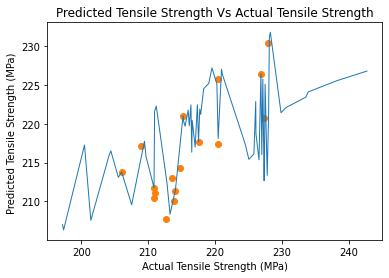

In [ ]:

plt.scatter(y_test,lr.predict(X_test),color = 'tab:orange', )
plt.plot(y_train, lr.predict(X_train),linewidth=1)
plt.title('Predicted Tensile Strength Vs Actual Tensile Strength')
plt.xlabel("Actual Tensile Strength (MPa)" )
plt.ylabel("Predicted Tensile Strength (MPa) ")

## SUPPORT VECTOR


Text(0, 0.5, 'Predicted Tensile Strength (MPa) ')

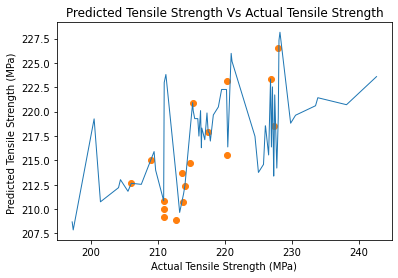

In [ ]:
plt.scatter(y_test,svm.predict(X_test),color = 'tab:orange')
plt.plot(y_train, svm.predict(X_train),linewidth=1)
plt.title('Predicted Tensile Strength Vs Actual Tensile Strength')
plt.xlabel("Actual Tensile Strength (MPa)" )
plt.ylabel("Predicted Tensile Strength (MPa) ")

## XGBOOST

Text(0, 0.5, 'Predicted Tensile Strength (MPa) ')

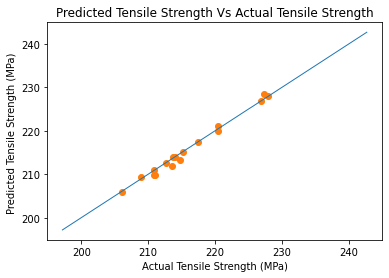

In [ ]:
plt.scatter(y_test,xgb.predict(X_test),color = 'tab:orange')
plt.plot(y_train, xgb.predict(X_train),linewidth=1)
plt.title('Predicted Tensile Strength Vs Actual Tensile Strength')
plt.xlabel("Actual Tensile Strength (MPa)" )
plt.ylabel("Predicted Tensile Strength (MPa) ")

## RANDOM FOREST

Text(0, 0.5, 'Predicted Tensile Strength (MPa) ')

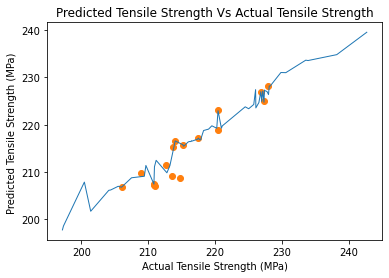

In [ ]:
plt.scatter(y_test,rf.predict(X_test),color = 'tab:orange')
plt.plot(y_train, rf.predict(X_train),linewidth=1)
plt.title('Predicted Tensile Strength Vs Actual Tensile Strength')
plt.xlabel("Actual Tensile Strength (MPa)" )
plt.ylabel("Predicted Tensile Strength (MPa) ")

## DECISION TREE

Text(0, 0.5, 'Predicted Tensile Strength (MPa) ')

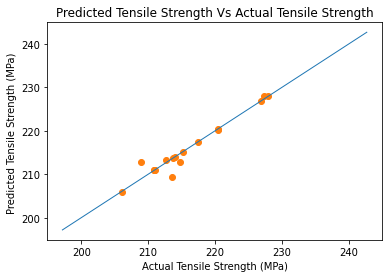

In [ ]:
plt.scatter(y_test,dt.predict(X_test),color = 'tab:orange')
plt.plot(y_train, dt.predict(X_train),linewidth=1)
plt.title('Predicted Tensile Strength Vs Actual Tensile Strength')
plt.xlabel("Actual Tensile Strength (MPa)" )
plt.ylabel("Predicted Tensile Strength (MPa) ")